#### **Nonlinear Optimisation Workshop Lab Sheet 1**
###### **Eishita Kalra 2746904**




In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ex13func import ex13 as func

$1.$ (i) Checking First and Second Order Optimality Conditions:

How many can you see?
From the contour plot below, I can see at least 9 stationary points. However, the graph of the function shows there may be more than 9 stationary points.


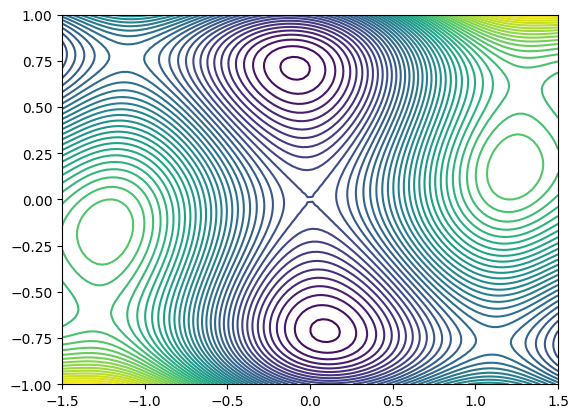

In [52]:
xlist = np.linspace(-1.5, 1.5, 100)
ylist = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = func(0, X, Y)
fig, ax = plt.subplots()
cp = ax.contour(X, Y, Z, 50)
plt.show()


To show that $x_1$, $x_2$, $x_3$ are stationary points, we check if the gradient of f at $x_i$ is 0. 

The gradient of f at $x_1$ is 0, therefore $x_1$ is a stationary point. The gradient of f at $x_2$ and $x_3$ is very small, therefore they can be considered stationary points. 

Since there is one eigenvalue for the hessian of f at $x_1$ which is positive and one which is negative, the hessian matrix is indefinite. Therefore, the stationary point at $x_1$ is neither a local minima or a local maxima. Therefore $x_1$ is a saddle point as it is neither a local minima or a local maxima.

Since both eigenvalues for the hessian of f at $x_2$ are positive, the hessian matrix is positive definite. Therefore, the stationary point at $x_2$ is a strict local minimum.

Since both eigenvalues for the hessian of f at $x_3$ are negative, the hessian matrix is negative definite. Therefore, the stationary point at $x_3$ is a strict local maximum.

In [53]:
G_1 = func(1, np.array([0, 0]))

G_2 = func(1, np.array([0.08984201, -0.7126564]))

G_3 = func(1, np.array([1.23022988, 0.16233458]))

print(f'The gradients of x_1, x_2 and x_3 are ', G_1, G_2, G_3, ' respectively.')

H_1 = func(2, [0, 0])
eig_1 = np.linalg.eigvals(H_1)

H_2 = func(2, [0.08984201, -0.7126564])
eig_2 = np.linalg.eigvals(H_2)

H_3 = func(2, [1.23022988, 0.16233458])
eig_3 = np.linalg.eigvals(H_3)

print(f'The eigenvalues of x_1 are ', eig_1[0], ' and ', eig_1[1])
print(f'The eigenvalues of x_2 are ', eig_2[0], ' and ', eig_2[1])
print(f'The eigenvalues of x_3 are ', eig_3[0], ' and ', eig_3[1])

The gradients of x_1, x_2 and x_3 are  [0. 0.] [-2.11532076e-08  4.63739571e-08] [-2.96559715e-08  3.35150316e-08]  respectively.
The eigenvalues of x_1 are  8.06225774829855  and  -8.06225774829855
The eigenvalues of x_2 are  7.682251424438178  and  16.493195028443104
The eigenvalues of x_3 are  -8.014907155904762  and  -5.953724193512003



$1$. (j) Second Order Taylor Approximation:

**Testing out different contour plots and colour maps:**

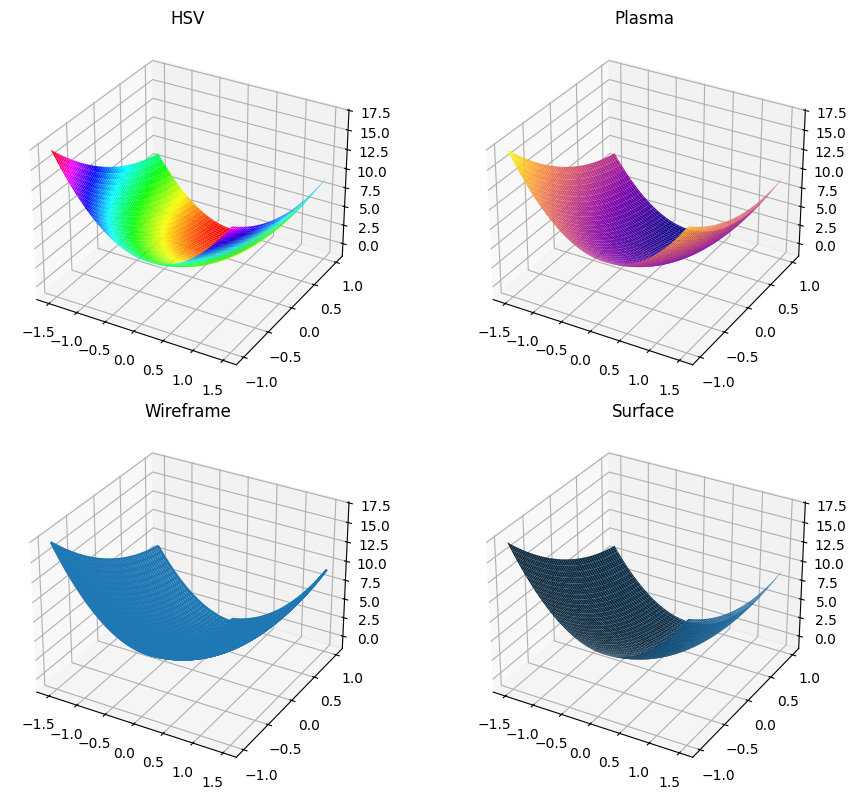

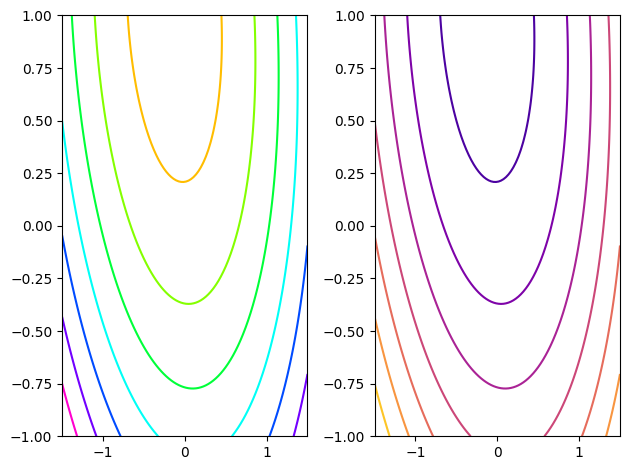

[[17.25       16.8597337  16.47681359 ... 13.59802571 13.92033976
  14.25      ]
 [17.05889705 16.66924293 16.28693501 ... 13.46630446 13.78923069
  14.11950311]
 [16.86942659 16.48038465 16.09868891 ... 13.33621569 13.65975411
  13.99063871]
 ...
 [ 6.31387103  5.98298643  5.65944802 ...  8.42192123  8.80361698
   9.19265891]
 [ 6.28111927  5.95084685  5.62792062 ...  8.44855117  8.8308591
   9.22051321]
 [ 6.25        5.92033976  5.59802571 ...  8.47681359  8.8597337
   9.25      ]]


In [54]:
x0 = 0
y0 = 0.5
f = func(0, [x0, y0])
g = func(1, [x0, y0])
H = func(2, [x0, y0])


xlist = np.linspace(-1.5, 1.5, 100)
ylist = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xlist, ylist)

XS = X-x0
YS = Y-y0
T = f + g[0]*XS + g[1]*YS + 0.5*H[0][0]*XS*XS + H[0][1]*XS*YS + 0.5*H[1][1]*YS*YS

fig1, axs1 = plt.subplots(2, 2, subplot_kw={"projection": "3d"}, figsize=(10, 8))

cp = axs1[0, 0].plot_surface(X, Y, T, cmap=plt.get_cmap('hsv'))
axs1[0, 0].set_title("HSV")

cp = axs1[0, 1].plot_surface(X, Y, T, cmap=plt.get_cmap('plasma'))
axs1[0, 1].set_title("Plasma")

cp = axs1[1, 0].plot_wireframe(X, Y, T)
axs1[1, 0].set_title("Wireframe")

cp = axs1[1, 1].plot_surface(X, Y, T)
axs1[1,1].set_title("Surface")

plt.tight_layout()
plt.show()

fig2, axs2 = plt.subplots(1, 2)
cp2 = axs2[0].contour(X, Y, T, cmap=plt.get_cmap('hsv'))
cp2 = axs2[1].contour(X, Y, T, cmap=plt.get_cmap('plasma'))

plt.tight_layout()
plt.show()

print(T)


**Plotting different values of $x_0$:**